In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [65]:
dataset = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

In [66]:
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [67]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [68]:
dataset.shape

(8950, 18)

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [70]:
CUST_ID = dataset['CUST_ID']
data = dataset.drop('CUST_ID', axis=1) 

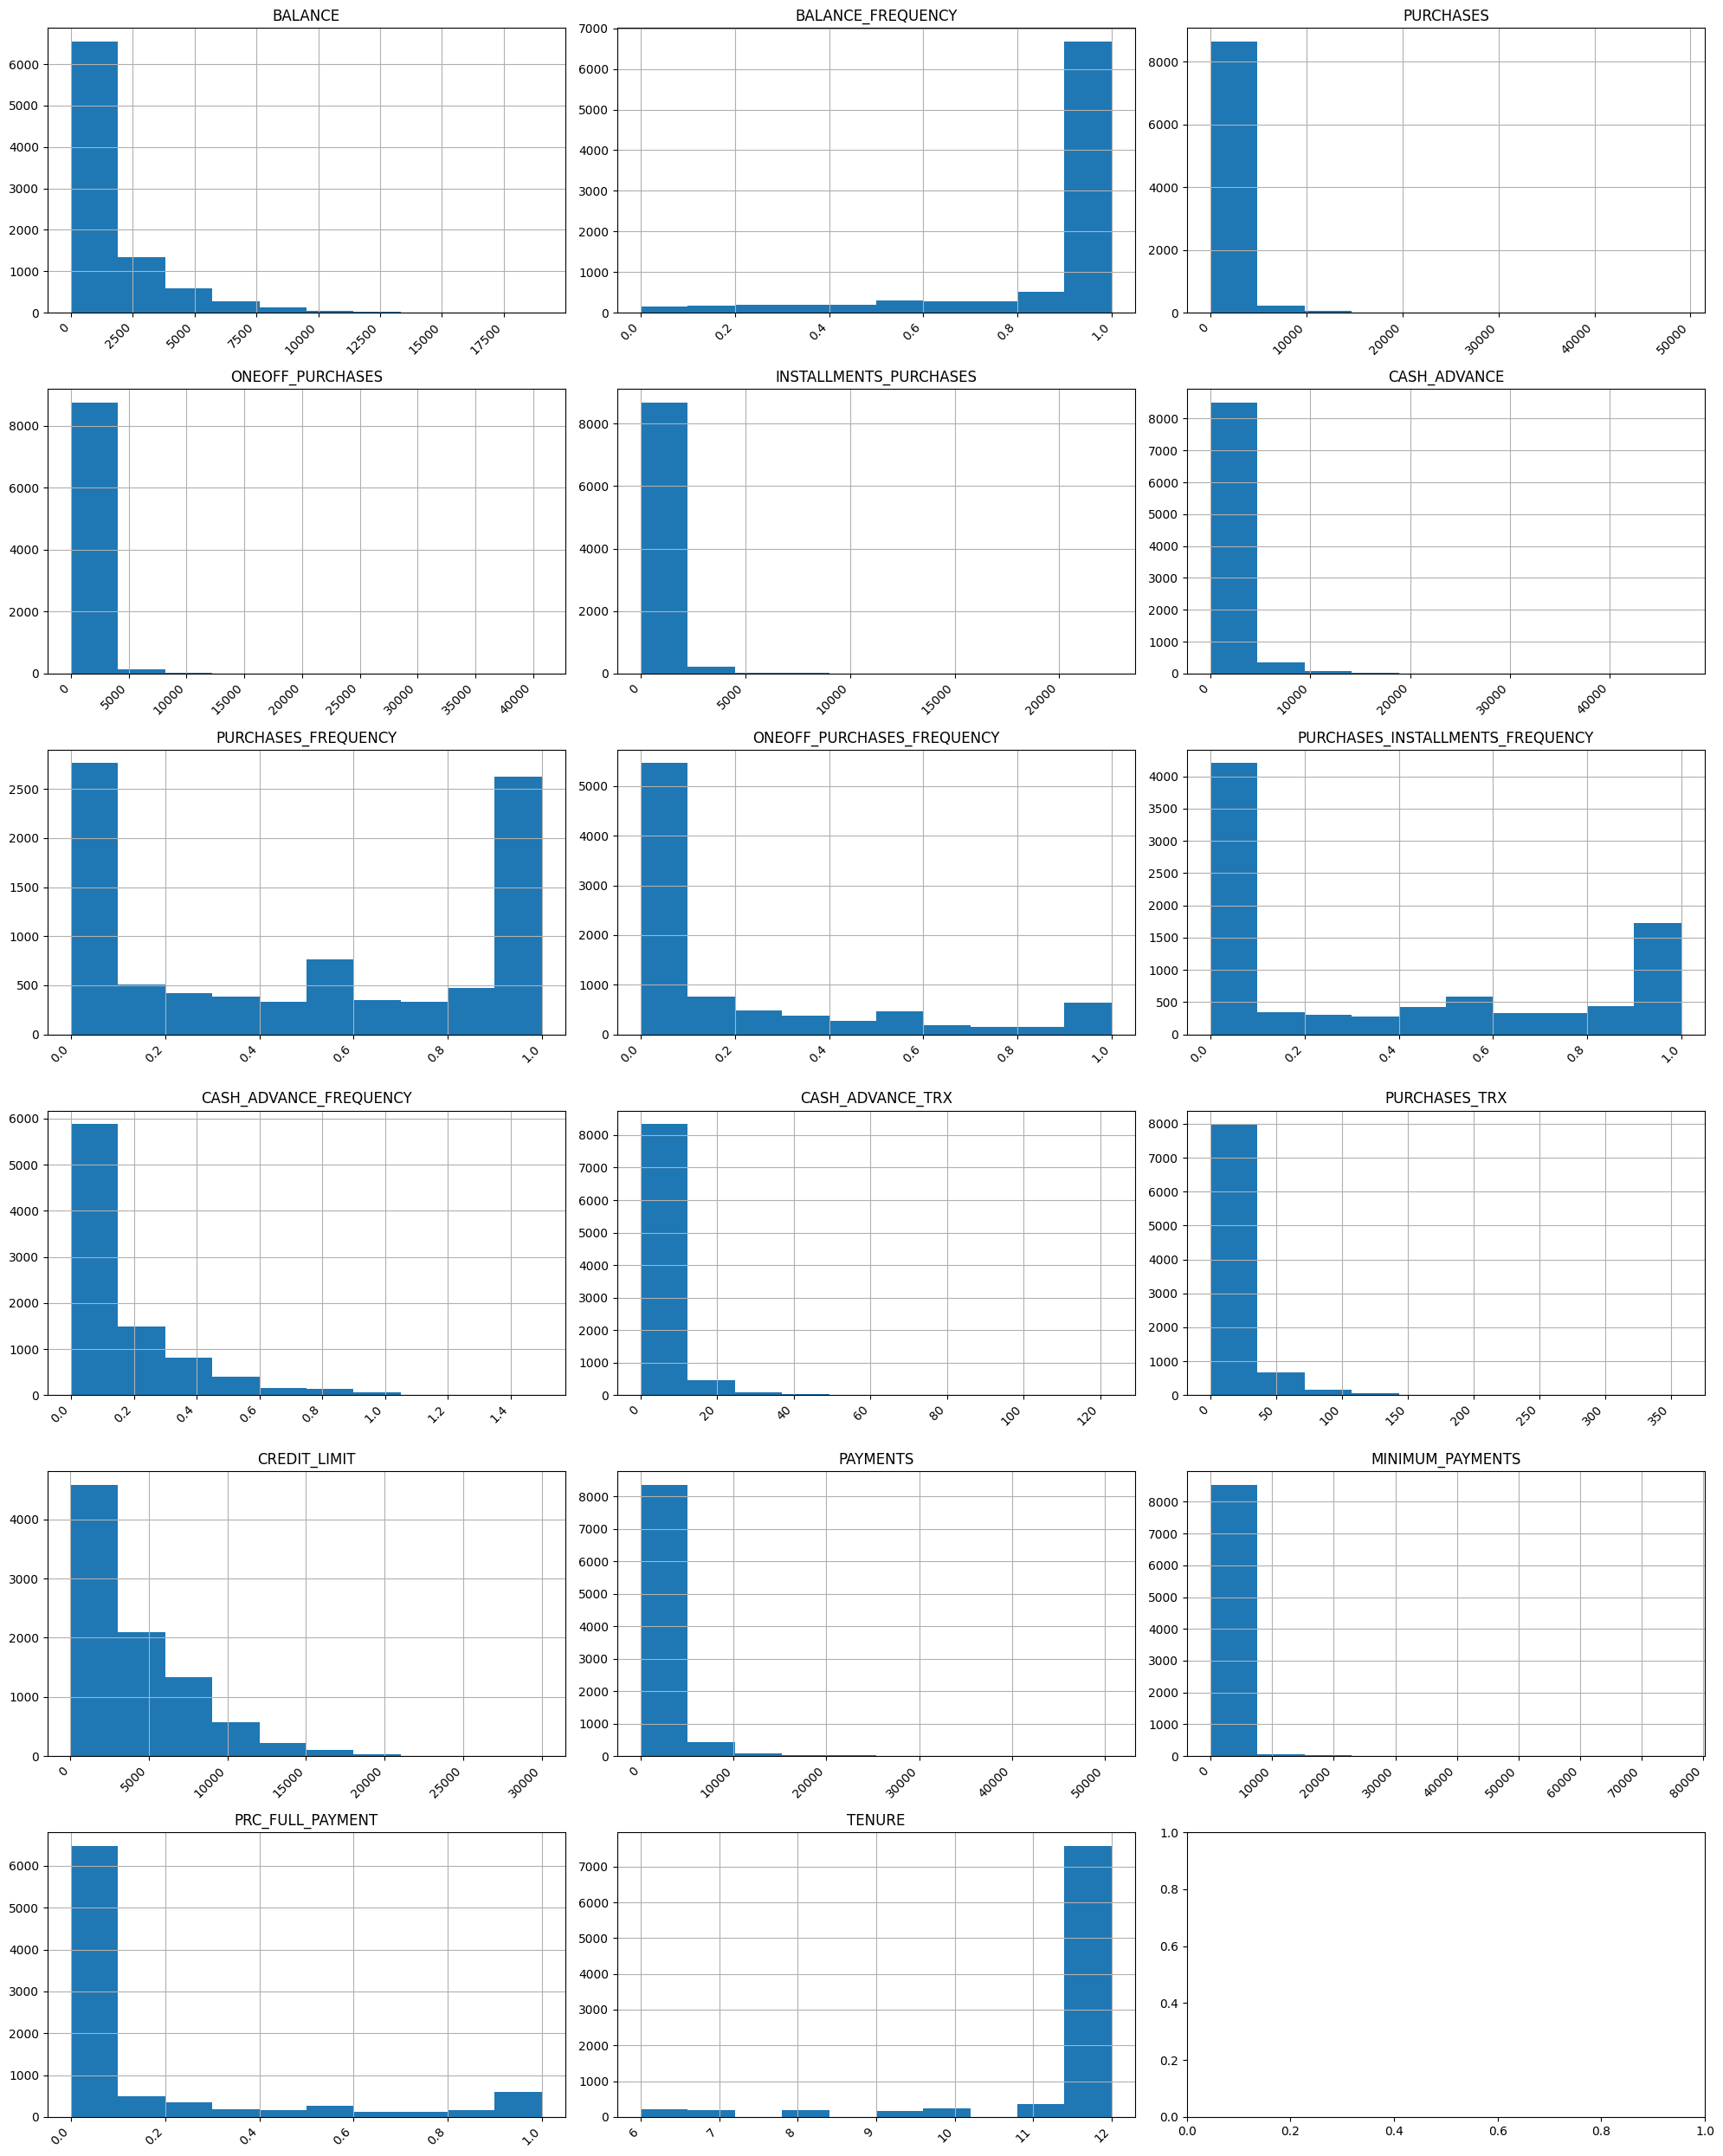

In [71]:
# Visulize the numerical data

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i, column in enumerate(data):
    ax = axes[i // 3, i % 3]
    data[column].hist(bins=10, ax=ax)
    ax.set_title(column)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [72]:
# Address missing values

missing_values = data[data.isnull().values]
missing_values

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [73]:
# Create knn imputer to deal with missing values

def knn_imp(df, na_target):
    df = df.copy()
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [74]:
for column in [
    'CREDIT_LIMIT',
    'MINIMUM_PAYMENTS'
]:
     
    data = knn_imp(data, column)

                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT

<AxesSubplot: >

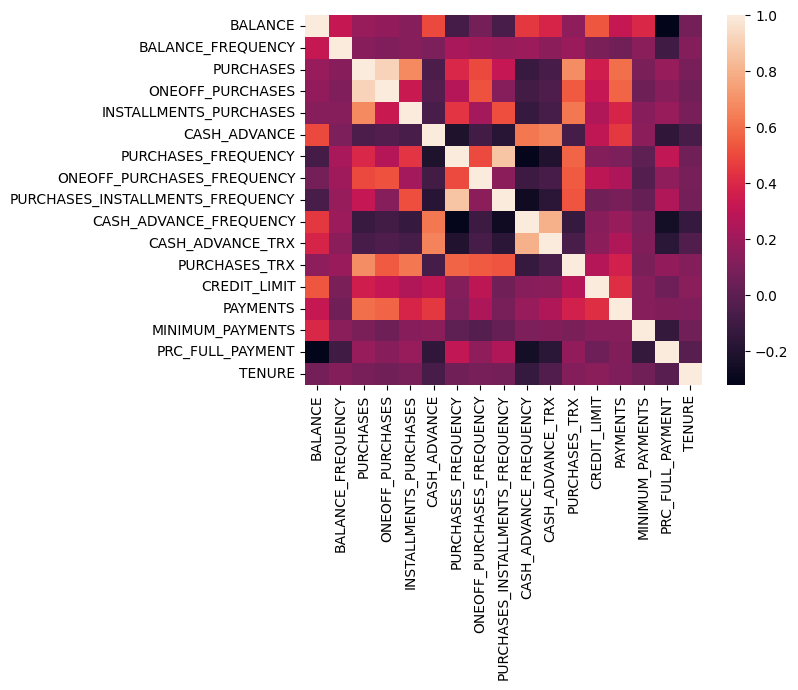

In [75]:
# Check the correlation between the numerical data

pd.set_option('display.max_rows', 37)

print(data.corr())
sns.heatmap(data.corr())

In [76]:
data1 = data

In [77]:
# Check if data is skewed

pd.set_option('display.max_rows', 17)
skew = pd.DataFrame(abs(data.skew()))
print(skew)

test_to_be_transformed = []

for index,row in skew.iterrows():
    if row[0] >= 0.5:
        test_to_be_transformed.append(index) 
test_to_be_transformed

                                          0
BALANCE                            2.393386
BALANCE_FREQUENCY                  2.023266
PURCHASES                          8.144269
ONEOFF_PURCHASES                  10.045083
INSTALLMENTS_PURCHASES             7.299120
CASH_ADVANCE                       5.166609
PURCHASES_FREQUENCY                0.060164
ONEOFF_PURCHASES_FREQUENCY         1.535613
PURCHASES_INSTALLMENTS_FREQUENCY   0.509201
CASH_ADVANCE_FREQUENCY             1.828686
CASH_ADVANCE_TRX                   5.721298
PURCHASES_TRX                      4.630655
CREDIT_LIMIT                       1.522627
PAYMENTS                           5.907620
MINIMUM_PAYMENTS                  13.629026
PRC_FULL_PAYMENT                   1.942820
TENURE                             2.943017


['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [78]:
# Transoform data

for i in ['BALANCE',
          'BALANCE_FREQUENCY',
          'PURCHASES',
          'ONEOFF_PURCHASES',
          'INSTALLMENTS_PURCHASES',
          'CASH_ADVANCE',
          'PURCHASES_FREQUENCY',
          'ONEOFF_PURCHASES_FREQUENCY',
          'PURCHASES_INSTALLMENTS_FREQUENCY',
          'CASH_ADVANCE_FREQUENCY',
          'CASH_ADVANCE_TRX',
          'PURCHASES_TRX',
          'PAYMENTS',
          'MINIMUM_PAYMENTS',
          'PRC_FULL_PAYMENT',
          'TENURE']:
    data[i] = np.log1p(data[i])

In [79]:
# Scale data

scaler = StandardScaler()
scaler.fit(data)
X_scaled = scaler.transform(data)
data = pd.DataFrame(X_scaled, index=data.index, columns = data.columns)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205218,-0.148757,-0.113532,-0.987090,0.394480,-0.930733,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-0.960336,-0.824484,-0.799538,-0.556368,0.347262
1,0.948918,0.179616,-1.679855,-0.987090,-1.087454,1.528788,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,0.688696,1.065033,0.903365,0.391958,0.347262
2,0.824993,0.492710,0.600727,1.062022,-1.087454,-0.930733,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,0.826116,-0.119300,0.454839,-0.556368,0.347262
3,0.624653,-0.857867,0.827499,1.265778,-1.087454,0.564372,-1.014151,-0.363042,-0.958256,-0.213583,-0.123281,-0.874655,0.826116,-4.161996,0.035539,-0.556368,0.347262
4,0.271260,0.492710,-0.708481,-0.114307,-1.087454,-0.930733,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-0.905368,-0.064979,-0.331189,-0.556368,0.347262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.379634,0.492710,0.266574,-0.987090,0.754107,-0.930733,1.196820,-0.732480,1.192408,-0.724360,-0.810069,0.037255,-0.960336,-0.525121,-1.666820,1.359774,-4.401425
8946,-1.568051,0.492710,0.276841,-0.987090,0.763821,-0.930733,1.196820,-0.732480,1.192408,-0.724360,-0.810069,0.037255,-0.960336,-0.628912,-0.706278,-0.556368,-4.401425
8947,-1.473834,-0.092906,0.027374,-0.987090,0.527794,-0.930733,0.883040,-0.732480,0.854234,-0.724360,-0.810069,-0.074955,-0.960336,-1.391318,-1.236231,0.498161,-4.401425
8948,-1.733775,-0.092906,-1.679855,-0.987090,-1.087454,0.086038,-1.302799,-0.732480,-0.958256,0.259328,0.278464,-1.379210,-1.097755,-1.661097,-1.558773,0.498161,-4.401425


In [80]:
# Elbow method

# Within-cluster sum of squares
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

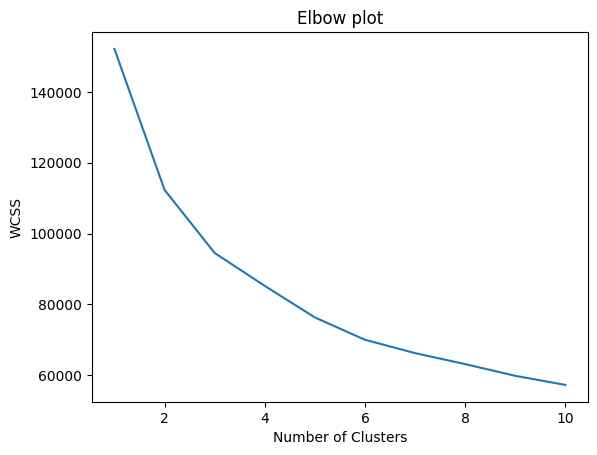

In [81]:
plt.plot(range(1,11), wcss)
plt.title('Elbow plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

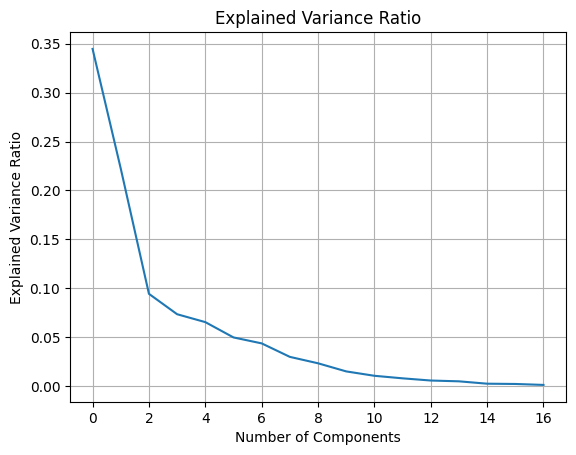

In [82]:
# Determine the number of components to retain using the elbow method again

# Perform PCA
pca = PCA()
pca.fit(data)

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [83]:
# Reduce the dimensionality using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(data)

In [84]:
kmeansmodel = KMeans(n_clusters = 6, random_state=42)
labels = kmeansmodel.fit_predict(X_reduced)
X_reduced

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-0.23970585, -2.52371183],
       [-3.49935868,  0.96163034],
       [ 1.45900111,  1.23970586],
       ...,
       [ 1.08748162, -3.09514941],
       [-2.73216336, -3.56672549],
       [-0.09624938, -0.49636134]])

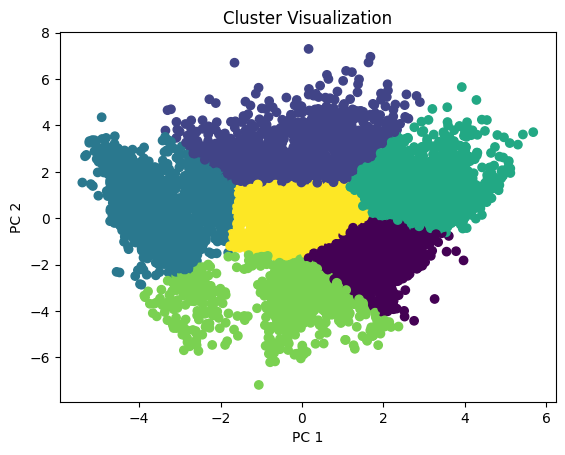

In [85]:
# Plot the clusters using a scatter plot
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Cluster Visualization')
plt.show()

In [86]:
labels = labels.reshape(len(X_reduced), 1)
labels.shape

(8950, 1)

In [87]:
labels = pd.DataFrame(data=labels, index=data1.index, columns=['CUST_SEG'])

In [88]:
final_data = pd.concat([CUST_ID, data1], axis=1)
final_data = pd.concat([labels, final_data], axis=1)

In [89]:
final_data

,CUST_SEG,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4,C10001,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,1000.0,5.312231,4.945277,0.000000,2.564949
1,2,C10002,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,7000.0,8.319725,6.978531,0.200671,2.564949
2,3,C10003,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,7500.0,6.434654,6.442994,0.000000,2.564949
3,5,C10004,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,7500.0,0.000000,5.942353,0.000000,2.564949
4,5,C10005,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,1200.0,6.521114,5.504483,0.000000,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0,C19186,3.384170,0.693147,5.677165,0.000000,5.677165,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,1000.0,5.788719,3.909748,0.405465,1.945910
8946,0,C19187,3.004851,0.693147,5.707110,0.000000,5.707110,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,1000.0,5.623517,5.056628,0.000000,1.945910
8947,4,C19188,3.194529,0.606136,4.979489,0.000000,4.979489,0.000000,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,1000.0,4.410016,4.423869,0.223144,1.945910
8948,4,C19189,2.671218,0.606136,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,500.0,3.980615,4.038755,0.223144,1.945910
